In [52]:
#import dataset
from keras.datasets import mnist

#load the MNIST dataset
(x_train,y_train), (x_test,y_test) = mnist.load_data()

print(x_train.shape)

(60000, 28, 28)


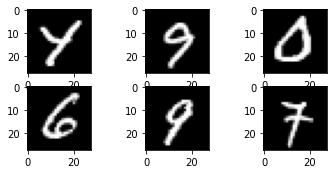

In [53]:
#visualize our data

import numpy as np
import matplotlib.pyplot as plt

plt.subplot(331)
random_number = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_number], cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_number = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_number], cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_number = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_number], cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_number = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_number], cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_number = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_number], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_number = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_number], cmap=plt.get_cmap('gray'))

plt.show()

In [54]:
#preparing Dataset for training
#store number of rows and columns

img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

#we need our data to be in right shape for keras. 
#We need to add 4th dimension to our data so we can convert (60000, 28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test  = x_test.reshape(x_test.shape[0], img_rows, img_cols,1)

#store the shape of a single image
input_shape = (img_rows, img_cols, 1) 

#change our image type to float32 type for keras
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

#normalize our data by changing the range from (0-255) to (0-1)

x_train /= 255
x_test /= 255

print("x_train shape:", y_train.shape)


x_train shape: (60000,)


In [55]:
#do hot one encoding

from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


#check the number of columns in hot one encoding matrix

print("number of classes" + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2] 
print(y_test.shape)



number of classes10
(10000, 10)


In [56]:
#build and compile model

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.optimizers import SGD

#create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01), metrics=['accuracy'])

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_18 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_9 (Flatten)         (None, 9216)              0         
                                                                 
 dense_18 (Dense)            (None, 128)               1179776   
                                                      

In [65]:
#train the model

batch_size = 32
epochs = 10

history = model.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 1, 
                    validation_data = (x_test,y_test))

score = model.evaluate(x_test,y_test, verbose=0)
print("Test loss: " + str(score[0]))
print("Test accuracy: "+ str(score[1]))

Epoch 1/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.1467 - accuracy: 0.9563 - val_loss: 0.0712 - val_accuracy: 0.9780
Epoch 2/10
1875/1875 [==============================] - 91s 49ms/step - loss: 0.1259 - accuracy: 0.9618 - val_loss: 0.0634 - val_accuracy: 0.9804
Epoch 3/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.1119 - accuracy: 0.9663 - val_loss: 0.0552 - val_accuracy: 0.9831
Epoch 4/10
1875/1875 [==============================] - 91s 49ms/step - loss: 0.1008 - accuracy: 0.9699 - val_loss: 0.0497 - val_accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0932 - accuracy: 0.9719 - val_loss: 0.0480 - val_accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0875 - accuracy: 0.9737 - val_loss: 0.0438 - val_accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.0812 - accuracy: 0.9753 - val_loss: 0.0431 

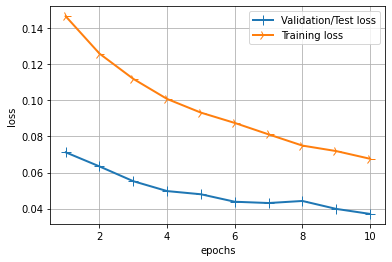

In [69]:
#plotting loss 

import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test loss')
line2 = plt.plot(epochs, loss_values, label="Training loss")
plt.setp(line1, linewidth=2.0, marker= '+',markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4',markersize=10.0)
plt.xlabel('epochs')
plt.ylabel("loss")
plt.grid(True)
plt.legend()
plt.show()

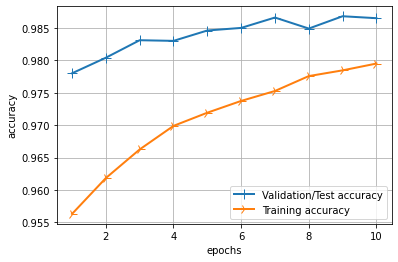

In [76]:
#plotting accuracy 

import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test accuracy')
line2 = plt.plot(epochs, acc_values, label="Training accuracy")
plt.setp(line1, linewidth=2.0, marker= '+',markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4',markersize=10.0)
plt.xlabel('epochs')
plt.ylabel("accuracy")
plt.grid(True)
plt.legend()
plt.show()

In [92]:
predict_x=model.predict(x_test) 
predict_classes=np.argmax(predict_x,axis=1)

In [77]:
#save the model

model.save("E:/ML Projects/Computer vision R_27.07.21/MNIST classification project/MNIST_CNN_model.h5")

In [78]:
#load our model

from keras.models import load_model

classifier = load_model("E:/ML Projects/Computer vision R_27.07.21/MNIST classification project/MNIST_CNN_model.h5")

In [100]:
import cv2
import numpy as np

def draw_test(name, pred, input_in):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_in,0,0,0,imageL.shape[0],cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred),(152,70),cv2.FONT_HERSHEY_COMPLEX_SMALL,4,(0,255,0),2)
    cv2.imshow(name,expanded_image)

for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    
    imageL = cv2.resize(input_im, None, fx=6,fy=4,interpolation=cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1)
    
    #get predictions
    res = str(np.argmax(model.predict(input_im), axis=-1))
    draw_test("predictions",res,imageL)
    
    cv2.waitKey(0)
cv2.destroyAllWindows()
